## Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [666]:
# Importamos librerias
# %matplotlib qt

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Cromaticas

In [667]:
# cargamos primera imagen
img_cro1 = cv.imread('./coord_cromaticas/CoordCrom_1.png')
img_cro2 = cv.imread('./coord_cromaticas/CoordCrom_2.png')
img_cro3 = cv.imread('./coord_cromaticas/CoordCrom_3.png')
print(f"Tamaño de la primera imagen: {img_cro1.shape}")
print(f"Tamaño de la segunda imagen: {img_cro2.shape}")
print(f"Tamaño de la tercera imagen: {img_cro3.shape}")

Tamaño de la primera imagen: (996, 908, 3)
Tamaño de la segunda imagen: (996, 908, 3)
Tamaño de la tercera imagen: (996, 908, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

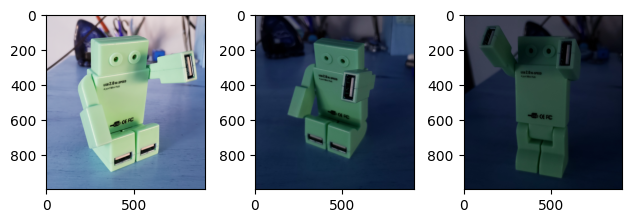

In [668]:
# Imagen original con problemas de color
figure = plt.figure()
images = [img_cro1, img_cro2, img_cro3]
for i in range(3):
    figure.add_subplot(1,3,i+1)
    plt.imshow(images[i])
    figure.tight_layout(pad=1)
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

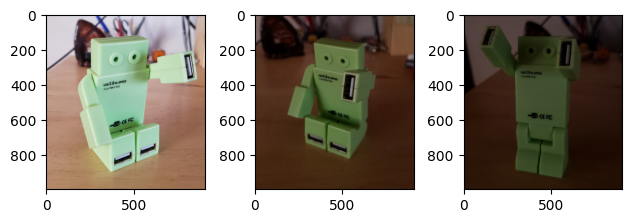

In [669]:
# pasar a RGB para ver el color original en este caso
imgRGB_cro1 = cv.cvtColor(img_cro1, cv.COLOR_BGR2RGB)
imgRGB_cro2 = cv.cvtColor(img_cro2, cv.COLOR_BGR2RGB)
imgRGB_cro3 = cv.cvtColor(img_cro3, cv.COLOR_BGR2RGB)

figure = plt.figure()
images = [imgRGB_cro1, imgRGB_cro2, imgRGB_cro3]
for i in range(3):
    figure.add_subplot(1,3,i+1)
    plt.imshow(images[i])
    figure.tight_layout(pad=1)
    
plt.show

In [670]:
# funcion para pasar a cromaticas
def cromaticas(img):
    
    #imgHSV = cv.cvtColor(img, cv.COLOR_RGB2HSV)

    # reducimos el brillo
    i = (np.max(img) - np.min(img))/2

    # Separamos canales 
    canal_r, canal_g, canal_b = cv.split(img)

    # sumamos los canales y multiplicamos por un escalar para balancear los colores
    sum_channels =  0.64* canal_r + 0.32* canal_g +  0.02* canal_b

    # aplicamos coordenadas cromaticas
    new_canal_r = np.where(sum_channels != 0, canal_r/(sum_channels), 0)  *i
    new_canal_g = np.where(sum_channels != 0, canal_g/(sum_channels), 0)  *i
    new_canal_b = np.where(sum_channels != 0, canal_b/(sum_channels), 0)  *i

    # unimos todos los canales
    img_mod = cv.merge((new_canal_r,new_canal_g,new_canal_b))

    # Convertir tipos de datos
    img_mod = img_mod.astype(img.dtype)

   # imgRGB = cv.cvtColor(img_mod, cv.COLOR_HSV2RGB)

    return img_mod

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_4142/1216773794.py:16: RuntimeWarning: invalid value encountered in divide
  new_canal_r = np.where(sum_channels != 0, canal_r/(sum_channels), 0)  *i
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_4142/1216773794.py:17: RuntimeWarning: invalid value encountered in divide
  new_canal_g = np.where(sum_channels != 0, canal_g/(sum_channels), 0)  *i
/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_4142/1216773794.py:18: RuntimeWarning: invalid value encountered in divide
  new_canal_b = np.where(sum_channels != 0, canal_b/(sum_channels), 0)  *i


<function matplotlib.pyplot.show(close=None, block=None)>

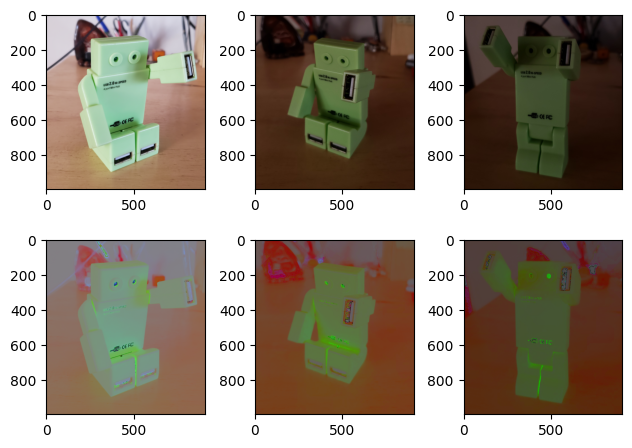

In [671]:
img_cro_1 = cromaticas(imgRGB_cro1)
img_cro_2 = cromaticas(imgRGB_cro2)
img_cro_3 = cromaticas(imgRGB_cro3)

figure = plt.figure()
images = [imgRGB_cro1, imgRGB_cro2, imgRGB_cro3, img_cro_1, img_cro_2, img_cro_3]
for i in range(6):
    figure.add_subplot(2,3,i+1)
    plt.imshow(images[i])
    figure.tight_layout(pad=1) 
plt.show

In [672]:
# contraste original
c_original_img1 = (np.max(imgRGB_cro1) - np.min(imgRGB_cro1))
c_original_img2 = (np.max(imgRGB_cro2) - np.min(imgRGB_cro2))
c_original_img3 = (np.max(imgRGB_cro3) - np.min(imgRGB_cro3))

# nuevo contraste
c_new_img1 = (np.max(img_cro_1) - np.min(img_cro_1))
c_new_img2 = (np.max(img_cro_2) - np.min(img_cro_2))
c_new_img3 = (np.max(img_cro_3) - np.min(img_cro_3))

print(f"Contraste original imagen 1: {c_original_img1}")
print(f"Contraste original imagen 2: {c_original_img2}")
print(f"Contraste original imagen 3: {c_original_img3}")
print(f"Contraste nuevo imagen 1: {c_new_img1}")
print(f"Contraste nuevo imagen 2: {c_new_img2}")
print(f"Contraste nuevo imagen 3: {c_new_img3}")

Contraste original imagen 1: 255
Contraste original imagen 2: 195
Contraste original imagen 3: 146
Contraste nuevo imagen 1: 255
Contraste nuevo imagen 2: 255
Contraste nuevo imagen 3: 254


**Analisis:**

Al aplicar la funcion cromatica para convertir nuestra imagen RGB a coordenadas cromaticas. Se obtuvo un buen resultado en general, ya que, se disminuyo lo más prosible la variacion del contraste entre las imagenes. Sin embargo, se ve que la iluminacion que trae la imagen original sigue afectando a la imagen de salida. 

White Patch

## Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.